## Tarea 5 Procesamiento de Imagenes 
Curso: MDS 112 Sección 1

Alumnos: 
>- Andrés Guevara
>- Mátias Hermosilla
>- Esteban Hernández

Se ha utilizado Python 3.9.2 para la ejecución
>- cv2
>- numpy
>- matplotlib
>- scipy

### Configuración

In [1]:
import cv2, numpy as np, scipy.ndimage as ndi, matplotlib.pyplot as plt
from platform import python_version
from skimage.measure import label
from skimage import filters, feature

save = lambda enunciado : plt.savefig(f"e{enunciado}.png", format="png", transparent=False)

plt.set_cmap("gray")
plt.rcParams['savefig.facecolor']='white'

'Versión: '+python_version()

'Versión: 3.9.2'

<Figure size 432x288 with 0 Axes>

### Enunciado - 1

filas: 662 - columnas: 826


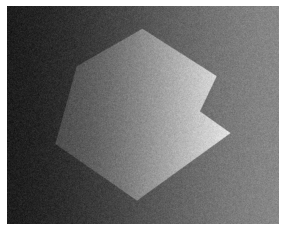

In [2]:
################################################################################
img = cv2.imread('rombo.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_norm = cv2.normalize(gray.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
noise = np.random.random(gray.shape)*0.3
output = gray_norm + noise

#############################################
filas, columnas = output.shape
print(f'filas: {filas} - columnas: {columnas}')
plt.axis('off')
plt.imshow(output)
save(1)
plt.show()

### Enunciado - 2

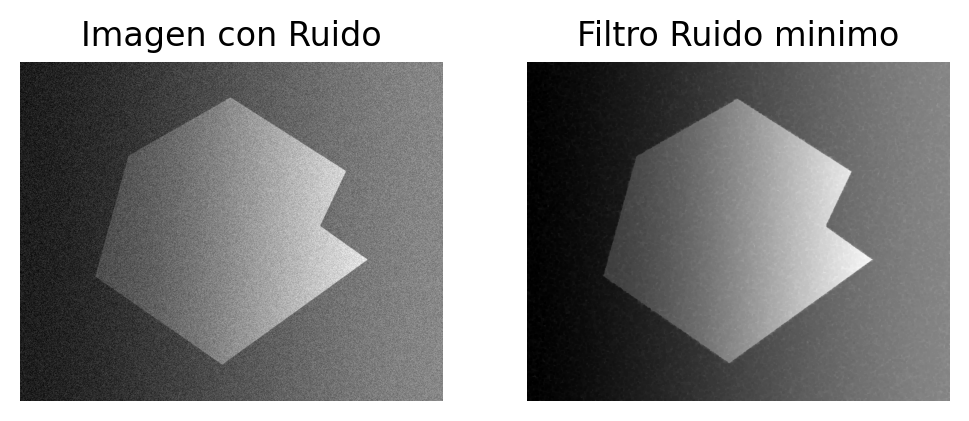

In [3]:
#filtro de orden estadístico
def minimo(matriz):
    v = matriz.flatten()
    minimo = np.min(v)
    return (minimo)

filtro_minimo = ndi.generic_filter(output, minimo, [5,5])

fig, ax = plt.subplots(nrows=1, ncols=2, dpi=200)
[_.axis("off") for _ in ax]

ax[0].imshow(output)
ax[0].set_title("Imagen con Ruido")

ax[1].imshow(filtro_minimo)
ax[1].set_title("Filtro Ruido minimo")

save(2)
plt.show()

### Enunciado - 3

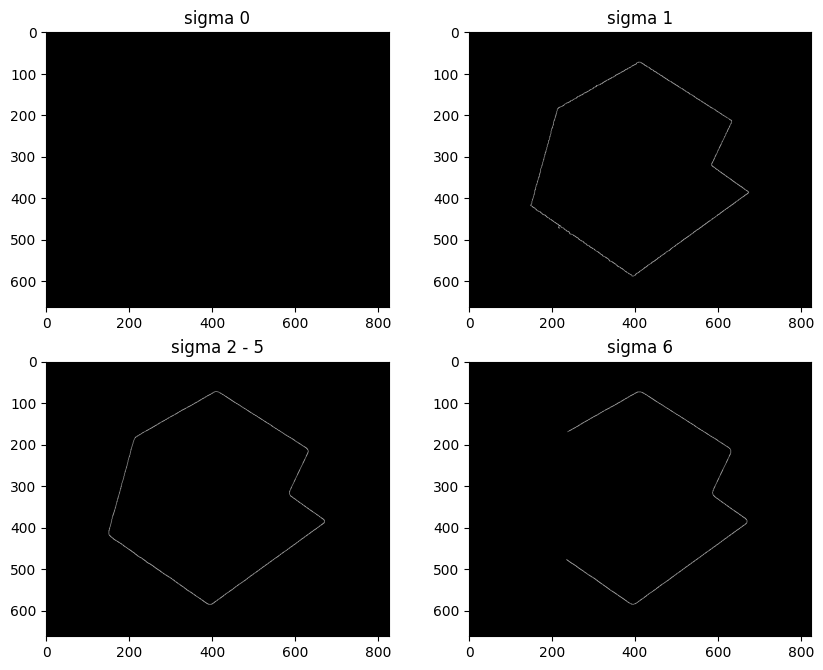

In [4]:
imagen_bordes = feature.canny(filtro_minimo, sigma=5)*1
fig, ax = plt.subplots(nrows=2, ncols=2, dpi=100, figsize=(10, 8))


#ax[0][0].imshow(feature.canny(filtro_minimo, sigma=0)*1)
#ax[0][0].set_title("sigma 0")

ax[0][0].imshow(cv2.Canny(filtro_minimo.astype("uint8"),0,200))
ax[0][0].set_title("sigma 0")

ax[0][1].imshow(feature.canny(filtro_minimo, sigma=1)*1)
ax[0][1].set_title("sigma 1")

ax[1][0].imshow(feature.canny(filtro_minimo, sigma=5)*1)
ax[1][0].set_title("sigma 2 - 5")

ax[1][1].imshow(feature.canny(filtro_minimo, sigma=6)*1)
ax[1][1].set_title("sigma 6")

save(3)
plt.show()

### Enunciado - 4

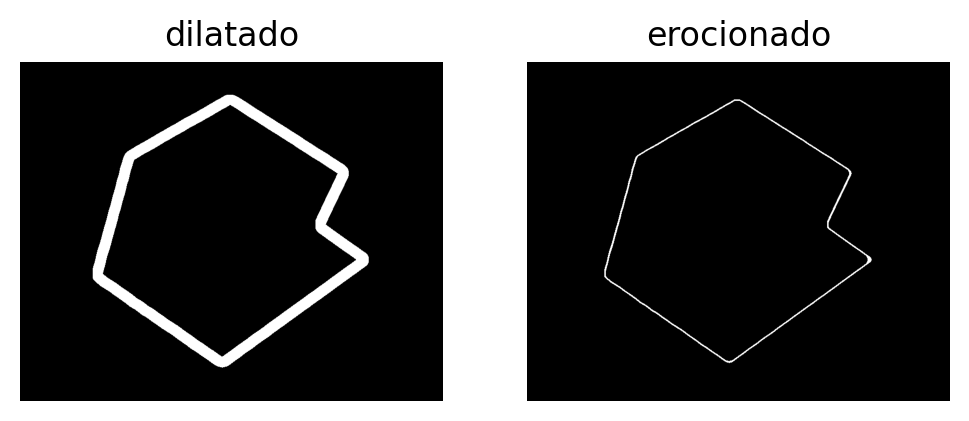

In [5]:
dilate = cv2.dilate(
    imagen_bordes.astype('uint8'), 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(20,20))
)

erode = cv2.erode(
    dilate.astype('uint8'),
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(18,18))
)

imagen_junta = erode

fig, ax = plt.subplots(nrows=1, ncols=2, dpi=200)
[_.axis("off") for _ in ax]

ax[0].imshow(dilate)
ax[0].set_title("dilatado")

ax[1].imshow(erode)
ax[1].set_title("erocionado")

save(4)
plt.show()

### Enunciado - 5

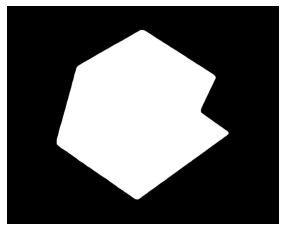

In [6]:
img_rellena = cv2.floodFill(imagen_junta, None, (int(filas/2),int(columnas/2)), (1))
img_rellena = img_rellena[1]
plt.axis('off')
plt.imshow(img_rellena)
save(5)
plt.show()
